In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from datasets import load_dataset


/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
lora_path = "ckpts/sft_gsm8kaug_llama7B_subsample/checkpoint_040000/hf_model/"
answer_types_all_21 = np.load(lora_path+"train_answer_types_4_seed0.npy")
answer_types_all_22 = np.load(lora_path+"train_answer_types_4_seed1.npy")
answer_types_all_2 = np.concatenate([answer_types_all_21, answer_types_all_22], axis=-1)


In [16]:
lora_path = "ckpts/sft_gsm8kaug_llama7B_subsample/checkpoint_020000/hf_model/"
answer_types_all_11 = np.load(lora_path+"train_answer_types_4_seed0.npy")
answer_types_all_12 = np.load(lora_path+"train_answer_types_4_seed1.npy")
answer_types_all_1 = np.concatenate([answer_types_all_11, answer_types_all_12], axis=-1)


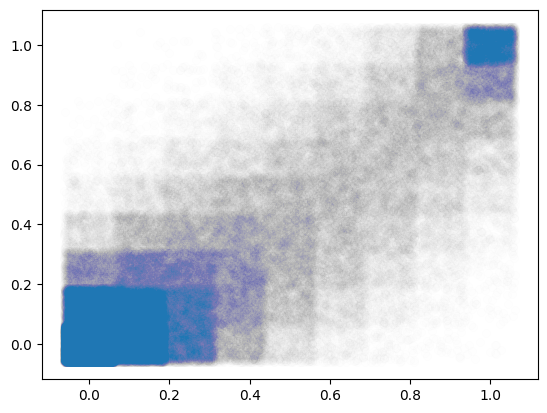

In [19]:
plt.scatter((answer_types_all_2==0).mean(axis=-1)+np.random.uniform(-0.125/2, 0.125/2, 157040), (answer_types_all_1==0).mean(axis=-1)+np.random.uniform(-0.125/2, 0.125/2, 157040), alpha=0.005)

(array([76063., 23523., 13801., 10053.,     0.,  8113.,  6523.,  6035.,
         5771.,  7158.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

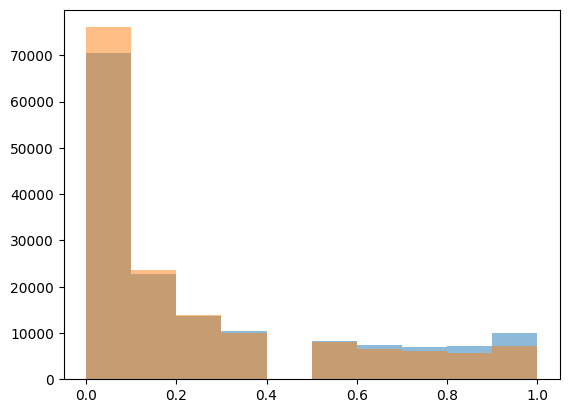

In [23]:
plt.hist((answer_types_all_2==0).mean(axis=-1), alpha=0.5)
plt.hist((answer_types_all_1==0).mean(axis=-1), alpha=0.5)

In [2]:
checkpoints = ["00500", "05000", "10000", "15000", "20000", "45000", "50000"]
num_correct_all = []
for checkpoint in checkpoints:
    model_path = f"ckpts/sft_gsm8k_llama7B_full3/checkpoint_{checkpoint}/hf_model/"        
    num_correct = (np.load(os.path.join(model_path, "train_answer_types_16.npy"))==0).sum(axis=-1)/16
    num_correct_all.append(num_correct)
num_correct_all = np.array(num_correct_all)
num_correct_all = np.mean(num_correct_all, axis=0)

In [8]:
dataset = load_dataset("gsm8k", "main")
train_questions = np.array(dataset["train"]["question"])
train_answers = np.array(dataset["train"]['answer'])

In [25]:
percentile_threshold = np.percentile(num_correct_all, 90)
subsample_idxs_easy = np.where((num_correct_all>percentile_threshold))[0]

In [10]:
train_questions[subsample_idxs_easy]

array(['Mary does her grocery shopping on Saturday. She does her shopping only at a specific store where she is allowed a credit of $100, which must be paid in full before her next shopping trip. That week she spent the full credit limit and paid $15 of it on Tuesday and $23 of it on Thursday. How much credit will Mary need to pay before her next shopping trip?',
       'Mr. Sam shared a certain amount of money between his two sons, Ken and Tony. If Ken got $1750, and Tony got twice as much as Ken, how much was the money shared?',
       'Lisa, Jack, and Tommy earned $60 from washing cars all week. However, half of the $60 was earned by Lisa. Tommy earned half of what Lisa earned. How much more money did Lisa earn than Tommy?',
       'Rachel and Sara want to attend a beauty and modeling contest. They both want to buy new pairs of shoes and dresses. Sara buys a pair of shoes which costs $50 and a dress which costs $200. How much should Rachel budget if she wants to spend twice as much 

In [17]:
train_answers[subsample_idxs_easy]

array(['Let S be the amount Alexis paid for the shoes.\nShe spent S + 30 + 46 + 38 + 11 + 18 = S + <<+30+46+38+11+18=143>>143.\nShe used all but $16 of her budget, so S + 143 = 200 - 16 = 184.\nThus, Alexis paid S = 184 - 143 = $<<184-143=41>>41 for the shoes.\n#### 41',
       'She works 8 hours a day for $18 per hour so she makes 8*18 = $<<8*18=144.00>>144.00 per 8-hour shift\nShe works 10 hours a day and anything over 8 hours is eligible for overtime, so she gets 10-8 = <<10-8=2>>2 hours of overtime\nOvertime is calculated as time and a half so and she makes $18/hour so her overtime pay is 18*.5 = $<<18*.5=9.00>>9.00\nHer overtime pay is 18+9 = $<<18+9=27.00>>27.00\nHer base pay is $144.00 per 8-hour shift and she works 5 days and makes 5 * $144 = $<<144*5=720.00>>720.00\nHer overtime pay is $27.00 per hour and she works 2 hours of overtime per day and makes 27*2 = $<<27*2=54.00>>54.00 in overtime pay\n2 hours of overtime pay for 5 days means she makes 54*5 = $270.00\nIn 5 days her 

In [20]:
percentile_threshold = np.percentile(num_correct_all, 5)
subsample_idxs_hard = np.where((num_correct_all==0))[0]


In [50]:
idx = 7
print(train_questions[subsample_idxs_hard][idx])
print(len(train_questions[subsample_idxs_hard][idx]))
print(train_answers[subsample_idxs_hard][idx])
print(len(train_answers[subsample_idxs_hard][idx]))

Studying for her test, Mitchell had read ten chapters of a book before 4 o'clock. When it clocked 4, Mitchell had read 20 pages of the 11th chapter of the book she was studying from. After 4 o'clock, she didn't read the remaining pages of chapter eleven but proceeded and read 2 more chapters of the book. If each chapter in the book had 40 pages, calculate the total number of pages that Mitchell had read altogether?
418
Since each chapter of the book has 40 pages, Mitchell had read 10*40 = <<10*40=400>>400 pages from the first ten chapters.
After reading 20 pages of the eleventh chapter, the total number of pages that Mitchell had read is 400+20 = <<400+20=420>>420
The next two chapters that she read had 2*40 = <<2*40=80>>80 pages.
In total, Mitchell read 420+80 = <<420+80=500>>500 pages of the book that day.
#### 500
405


In [52]:
train_answers[subsample_idxs_hard][idx]

'Since each chapter of the book has 40 pages, Mitchell had read 10*40 = <<10*40=400>>400 pages from the first ten chapters.\nAfter reading 20 pages of the eleventh chapter, the total number of pages that Mitchell had read is 400+20 = <<400+20=420>>420\nThe next two chapters that she read had 2*40 = <<2*40=80>>80 pages.\nIn total, Mitchell read 420+80 = <<420+80=500>>500 pages of the book that day.\n#### 500'

In [27]:
print(np.mean([len(a) for a in train_answers[subsample_idxs_hard]]))
print(np.std([len(a) for a in train_answers[subsample_idxs_hard]]))

401.2459259259259
175.7108870182359


In [28]:
print(np.mean([len(a) for a in train_answers[subsample_idxs_easy]]))
print(np.std([len(a) for a in train_answers[subsample_idxs_easy]]))

172.65822784810126
68.72456644363137


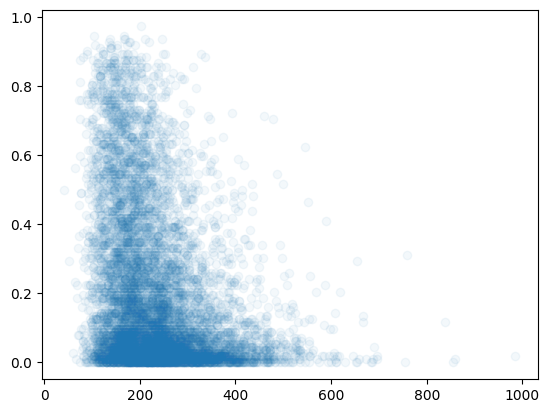

In [31]:
plt.scatter([len(a) for a in train_questions], num_correct_all, alpha=0.05)

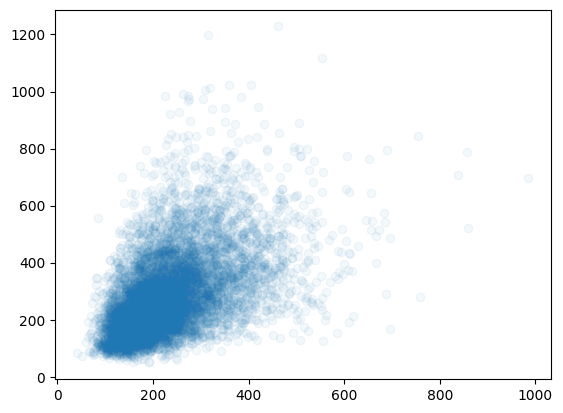

In [32]:
plt.scatter([len(a) for a in train_questions], [len(a) for a in train_answers], alpha=0.05)

In [3]:
def get_bin_mean(x_axis, y_axis, bins):
    x_axis = np.array(x_axis)
    y_axis = np.array(y_axis)
    bin_avgs = []
    bin_stds = []
    for i in range(len(bins)-1):
        idxs = np.where((x_axis >= bins[i]) & (x_axis < bins[i+1]))[0]
        # print(len(idxs))
        bin_avgs.append(np.mean(y_axis[idxs]))
        bin_stds.append(np.std(y_axis[idxs]))
    return np.array(bin_avgs), np.array(bin_stds)

In [38]:
base_accs = (np.load("llama7B_GSM8k_test_answer_types_all100.npy")==0).mean(axis=-1)



hard25_accs = np.load("ckpts/sft_gsm8k_llama7B_subsample2_hard25/checkpoint_04000/hf_model/test_answer_types_100.npy")
hard25_accs = (hard25_accs==0).mean(-1)

easy75_accs = np.load("ckpts/sft_gsm8k_llama7B_subsample2_easy75/checkpoint_04000/hf_model/test_answer_types_100.npy")
easy75_accs = (easy75_accs==0).mean(-1)

rand25_accs = np.load("ckpts/sft_gsm8k_llama7B_subsample4_rand25/checkpoint_04000/hf_model/test_answer_types_100.npy")
rand25_accs = (rand25_accs==0).mean(-1)

[0.   0.   0.01 0.01 0.03 0.04 0.07 0.11 0.19 0.33 0.81]


/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Test examples')

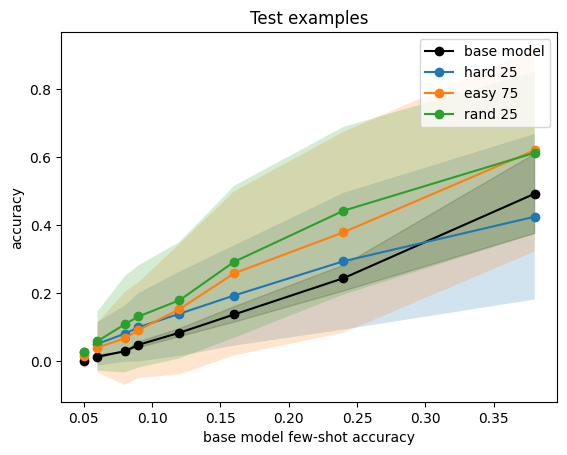

In [42]:
# plt.scatter(base_accs, hard25_accs, alpha=0.05)
# plt.scatter(base_accs, easy75_accs, alpha=0.05)
# plt.scatter(base_accs, rand25_accs, alpha=0.05)

delta = 0.1
# bins = np.arange(0, 0.9, delta)
bins = np.percentile(base_accs, np.arange(0, 110, 10))
print(bins)

# delta = 0.75
# bins = np.arange(-4.8, 0, delta)

# plt.plot([0, 1], [0, 1], color="black")

base_means, base_stds = get_bin_mean(base_accs, base_accs_orig, bins)
plt.plot(bins[:-1]+delta/2 ,base_means, "o-", color = "black", label = "base model")
plt.fill_between(bins[:-1]+delta/2, base_means-base_stds, base_means+base_stds, alpha=0.2, color = "black")

hard25_means, hard25_stds = get_bin_mean(base_accs, hard25_accs, bins)
# plt.fill(bins[:-1]+0.25 ,hard25_means,  hard25_stds, alpha=0.8)
plt.plot(bins[:-1]+delta/2 ,hard25_means, "o-", label = "hard 25")
plt.fill_between(bins[:-1]+delta/2, hard25_means-hard25_stds, hard25_means+hard25_stds, alpha=0.2)

easy75_means, easy75_stds = get_bin_mean(base_accs, easy75_accs, bins)
# plt.errorbar(bins[:-1]+delta/2 ,easy75_means,  easy75_stds, alpha=0.8)
plt.plot(bins[:-1]+delta/2 ,easy75_means, "o-", label = "easy 75")
plt.fill_between(bins[:-1]+delta/2, easy75_means-easy75_stds, easy75_means+easy75_stds, alpha=0.2)

rand25_means, rand25_stds = get_bin_mean(base_accs, rand25_accs, bins)
# plt.errorbar(bins[:-1]+delta/2 ,rand25_means,  rand25_stds, alpha=0.8)
plt.plot(bins[:-1]+delta/2 ,rand25_means, "o-", label = "rand 25")
plt.fill_between(bins[:-1]+delta/2, rand25_means-rand25_stds, rand25_means+rand25_stds, alpha=0.2)

plt.xlabel("base model few-shot accuracy")
plt.ylabel("accuracy")
plt.legend()
plt.title("Test examples")

In [33]:
base_accs = np.log(base_accs_orig+0.01)
hard25_accs = np.log(hard25_accs+0.01)
easy75_accs = np.log(easy75_accs+0.01)
rand25_accs = np.log(rand25_accs+0.01)

Text(0.5, 1.0, 'Test examples')

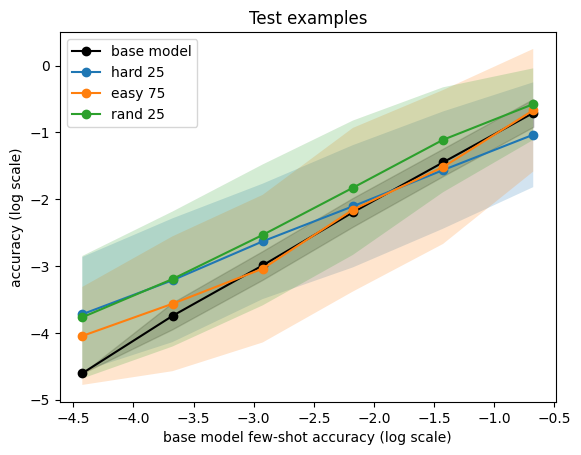

In [35]:
# plt.scatter(base_accs, hard25_accs, alpha=0.05)
# plt.scatter(base_accs, easy75_accs, alpha=0.05)
# plt.scatter(base_accs, rand25_accs, alpha=0.05)




# delta = 0.1
# bins = np.arange(0, 0.9, delta)

delta = 0.75
bins = np.arange(-4.8, 0, delta)

# plt.plot([0, 1], [0, 1], color="black")
base_means, base_stds = get_bin_mean(base_accs, base_accs, bins)
plt.plot(bins[:-1]+delta/2 ,base_means, "o-", color = "black", label = "base model")
plt.fill_between(bins[:-1]+delta/2, base_means-base_stds, base_means+base_stds, alpha=0.2, color = "black")

hard25_means, hard25_stds = get_bin_mean(base_accs, hard25_accs, bins)
# plt.fill(bins[:-1]+0.25 ,hard25_means,  hard25_stds, alpha=0.8)
plt.plot(bins[:-1]+delta/2 ,hard25_means, "o-", label = "hard 25")
plt.fill_between(bins[:-1]+delta/2, hard25_means-hard25_stds, hard25_means+hard25_stds, alpha=0.2)

easy75_means, easy75_stds = get_bin_mean(base_accs, easy75_accs, bins)
# plt.errorbar(bins[:-1]+delta/2 ,easy75_means,  easy75_stds, alpha=0.8)
plt.plot(bins[:-1]+delta/2 ,easy75_means, "o-", label = "easy 75")
plt.fill_between(bins[:-1]+delta/2, easy75_means-easy75_stds, easy75_means+easy75_stds, alpha=0.2)

rand25_means, rand25_stds = get_bin_mean(base_accs, rand25_accs, bins)
# plt.errorbar(bins[:-1]+delta/2 ,rand25_means,  rand25_stds, alpha=0.8)
plt.plot(bins[:-1]+delta/2 ,rand25_means, "o-", label = "rand 25")
plt.fill_between(bins[:-1]+delta/2, rand25_means-rand25_stds, rand25_means+rand25_stds, alpha=0.2)

plt.xlabel("base model few-shot accuracy (log scale)")
plt.ylabel("accuracy (log scale)")
plt.legend()
plt.title("Test examples")
